# CAMPO MAGNETICO SU DISTANZA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
def chi_quadro(funzione, popt, x, y, yerr):
    y_fit = funzione(x, *popt)  # Calcola i valori della funzione di fit
    chi2 = np.sum(((y - y_fit) / yerr) ** 2)  # Formula del chi quadro
    dof = len(x) - len(popt)  # Gradi di libertà
    return chi2 / dof  # Chi quadro ridotto

In [4]:
def reciproco_cubo(x, a, delta_x, q):
    cubo_binomio = x*x*x + 3*x*x*delta_x + 3*x*delta_x*delta_x + delta_x*delta_x*delta_x
    return a/cubo_binomio + q

In [5]:
def due_reciproci_cubi(x, a1, delta_x1, a2, delta_x2, q):
    cubo1 = (x+delta_x1)**3
    cubo2 = (x+delta_x2)**3
    return a1/cubo1 + a2/cubo2 + q

In [6]:
def esponente_libero(x, n, a, delta_x, q):
    esponente = min(n,20)
    den = (x+delta_x)**esponente
    return a/den + q

In [7]:
# Funzione per propagare l'errore
def propagate_error(x, func, popt, param_errors):
    partials = []
    delta = 1e-6  # Piccola variazione per il calcolo numerico delle derivate
    for i in range(len(popt)):
        popt_up = popt.copy()
        popt_down = popt.copy()
        popt_up[i] += delta
        popt_down[i] -= delta
        partial_derivative = (func(x, *popt_up) - func(x, *popt_down)) / (2 * delta)
        partials.append(partial_derivative)
    partials = np.array(partials)
    error = np.sqrt(np.sum((partials * param_errors) ** 2))
    return error

In [8]:
# quella di erika
def altra (x, n, B0, x0):
    denom = 1 + (x/x0) ** n
    return B0 / denom

## Magnete grande

/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_9336/3434090122.py:3: RuntimeWarning: invalid value encountered in power
  den = (x+delta_x)**esponente
/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_9336/1063926449.py:3: RuntimeWarning: divide by zero encountered in divide
  denom = 1 + (x/x0) ** n


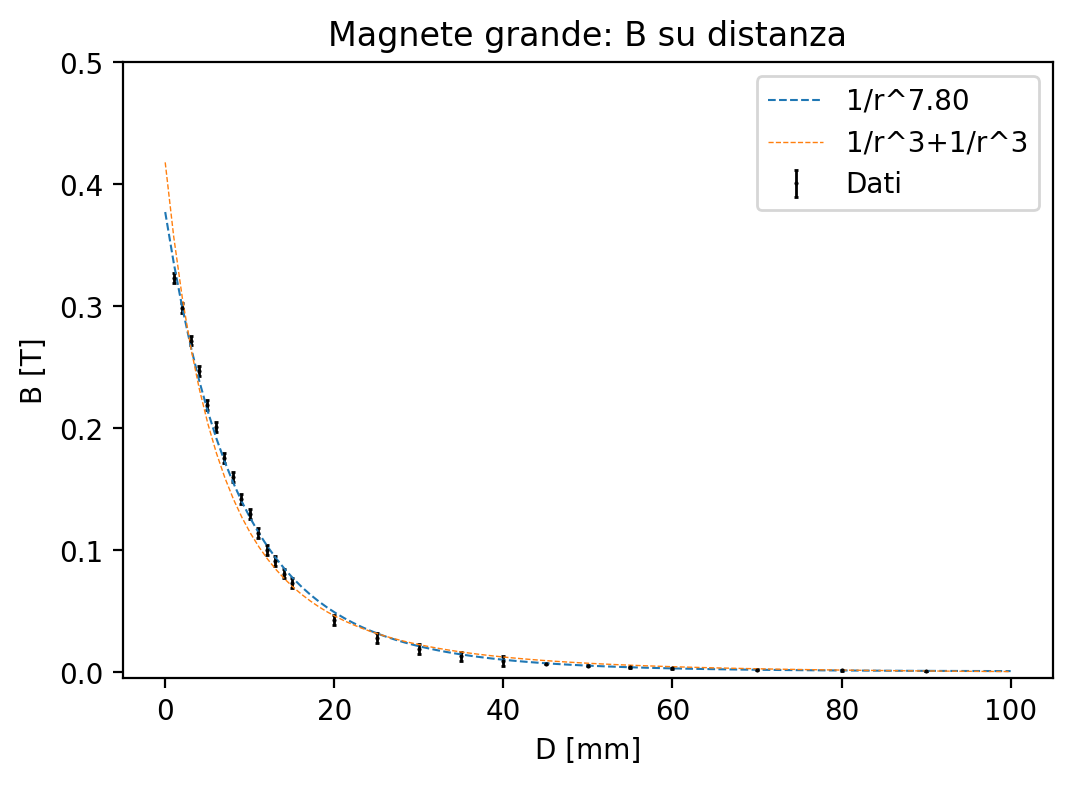

In [9]:
dati2 = np.loadtxt("data/magnete_grande_su_d.csv", skiprows=1)

d2 = dati2[:,1]   # ascissa
B2 = dati2[:,0]   # ordinata
err_B2 = dati2[:,2] # errore su B

## TOGLIERE IL PRIMO PUNTO? ##
d2 = d2[1:]   
B2 = B2[1:]   
err_B2 = err_B2[1:] * 4

low1 = (-np.inf, -np.inf, -0.001)
upp1 = (np.inf, np.inf, 0.001)
low2 = (0, -np.inf, -np.inf, -0.001)
upp2 = (20, np.inf, np.inf, 0.001)
low3 = (-np.inf, -np.inf, -np.inf, -np.inf, -0.001)
upp3 = (np.inf, np.inf, np.inf, np.inf, 0.001)

# FIT #
popt2_1, pcov2_1 = curve_fit(reciproco_cubo, d2, B2, sigma=err_B2, bounds=(low1,upp1))
popt2_2, pcov2_2 = curve_fit(esponente_libero, d2, B2, sigma=err_B2, bounds=(low2,upp2), maxfev=10000)
popt2_3, pcov2_3 = curve_fit(altra, d2, B2, sigma=err_B2, bounds=(low1,upp1), maxfev=10000)
popt2_4, pcov2_4 = curve_fit(due_reciproci_cubi, d2, B2, sigma=err_B2, bounds=(low3,upp3), maxfev=100000)


plt.figure(figsize=(6, 4), dpi=200)
# dati
plt.errorbar(
    d2, B2, yerr=err_B2,
    fmt='o',  # Solo marker, senza linee tra i punti
    markersize=0.5,  # Dimensione dei marker leggermente aumentata
    elinewidth=1,  # Spessore delle barre d'errore ridotto per leggibilità
    capsize=0.8,  # Aggiunge terminali alle barre d'errore
    capthick=1,  # Spessore dei terminali
    color='black',  # Colore neutro per evitare distrazioni
    label='Dati'
)
x_fit2 = np.linspace(0, 100, 100)  # Intervallo per il fit
# CUBO
y_fit2_1 = reciproco_cubo(x_fit2, *popt2_1)
etichetta2_1 = f"a={popt2_1[0]:.2f}\nΔx={popt2_1[1]:.2f}\nΔy={popt2_1[2]:.2f}"
#plt.plot(x_fit2, y_fit2_1, linestyle='--', label='1/r^3', markersize=3, linewidth=0.5)
# ESPONENTE PARAMETRO LIBERO
y_fit2_2 = esponente_libero(x_fit2, *popt2_2)
etichetta2_2 = f"a={popt2_2[0]:.2f}\nΔx={popt2_2[1]:.2f}\nΔy={popt2_2[2]:.2f}"
plt.plot(x_fit2, y_fit2_2, linestyle='--', label=f'1/r^{popt2_2[0]:.2f}', markersize=3, linewidth=0.75)
# ALTRA
y_fit2_3 = altra(x_fit2, *popt2_3)
#plt.plot(x_fit2, y_fit2_3, linestyle='--', label=rf'$B_0$=1/1+(r)^{popt2_3[0]:.2f}', markersize=3, linewidth=0.75)
# DUE RECIPROCI CUBI
y_fit2_4 = due_reciproci_cubi(x_fit2, *popt2_4)
#etichetta2_4 = f"a={popt2_1[0]:.2f}\nΔx={popt2_1[1]:.2f}\nΔy={popt2_1[2]:.2f}"
plt.plot(x_fit2, y_fit2_4, linestyle='--', label='1/r^3+1/r^3', markersize=3, linewidth=0.5)

plt.xlabel("D [mm]")
#plt.yscale('log')
plt.ylabel("B [T]") # [T]
plt.ylim(-0.005, 0.5)
plt.title("Magnete grande: B su distanza")
#plt.grid(linestyle='--')
plt.legend()
plt.show()

In [10]:
chi2_2_1 = chi_quadro(reciproco_cubo, popt2_1, d2, B2, err_B2)
chi2_2_2 = chi_quadro(esponente_libero, popt2_2, d2, B2, err_B2)
chi2_2_4 = chi_quadro(due_reciproci_cubi, popt2_4, d2, B2, err_B2)


print(f"Chi quadro ridotto per 1/r^3: {chi2_2_1:.3f}")
print(f"Chi quadro ridotto per 1/r^{popt2_2[0]:.2f}: {chi2_2_2:.3f}")
print(f"Chi quadro ridotto per 1/r^3+1/r^3: {chi2_2_4:.3f}")


Chi quadro ridotto per 1/r^3: 12.239
Chi quadro ridotto per 1/r^7.80: 1.396
Chi quadro ridotto per 1/r^3+1/r^3: 13.352


# STIMA DI B USANDO f{popt2_2[0]}

In [11]:
# stime numeriche usando la funzione fittata
distanze = range(1,36)
B_da_1_a_35 = [esponente_libero(d, *popt2_2) for d in distanze]
B0 = esponente_libero(0.1, *popt2_2)

# Calcolo l'errore sui parametri
param_errors = np.sqrt(np.diag(pcov2_2))

# Calcolo l'errore sulle stime
B_da_1_a_35_err = [propagate_error(d, esponente_libero, popt2_2, param_errors) for d in distanze]
B0_err = propagate_error(0.1, esponente_libero, popt2_2, param_errors)

# Stampo i risultati
print(f" d [mm] |   B [T]   |   σ [T]")
print(f"--------|-----------|----------")
print(f"   .1   |  {B0:.5f}  |  {B0_err:.5f}")
for i, d in enumerate(distanze):
    if d < 10:
        print(f"    {d}   |  {B_da_1_a_35[i]:.5f}  |  {B_da_1_a_35_err[i]:.5f}")
    else:
        print(f"   {d}   |  {B_da_1_a_35[i]:.5f}  |  {B_da_1_a_35_err[i]:.5f}")

 d [mm] |   B [T]   |   σ [T]
--------|-----------|----------
   .1   |  0.37298  |  0.05126
    1   |  0.33603  |  0.04591
    2   |  0.29974  |  0.04070
    3   |  0.26782  |  0.03614
    4   |  0.23969  |  0.03216
    5   |  0.21486  |  0.02866
    6   |  0.19291  |  0.02559
    7   |  0.17346  |  0.02289
    8   |  0.15620  |  0.02051
    9   |  0.14086  |  0.01840
   10   |  0.12721  |  0.01654
   11   |  0.11504  |  0.01488
   12   |  0.10417  |  0.01342
   13   |  0.09446  |  0.01211
   14   |  0.08576  |  0.01095
   15   |  0.07797  |  0.00991
   16   |  0.07097  |  0.00898
   17   |  0.06467  |  0.00815
   18   |  0.05901  |  0.00741
   19   |  0.05391  |  0.00674
   20   |  0.04930  |  0.00614
   21   |  0.04514  |  0.00560
   22   |  0.04138  |  0.00511
   23   |  0.03797  |  0.00467
   24   |  0.03488  |  0.00428
   25   |  0.03208  |  0.00392
   26   |  0.02953  |  0.00359
   27   |  0.02722  |  0.00330
   28   |  0.02511  |  0.00303
   29   |  0.02319  |  0.00279
   30   

---

# MAGNETE PICCOLO

/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_9336/3434090122.py:3: RuntimeWarning: invalid value encountered in power
  den = (x+delta_x)**esponente
/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_9336/1063926449.py:3: RuntimeWarning: divide by zero encountered in divide
  denom = 1 + (x/x0) ** n


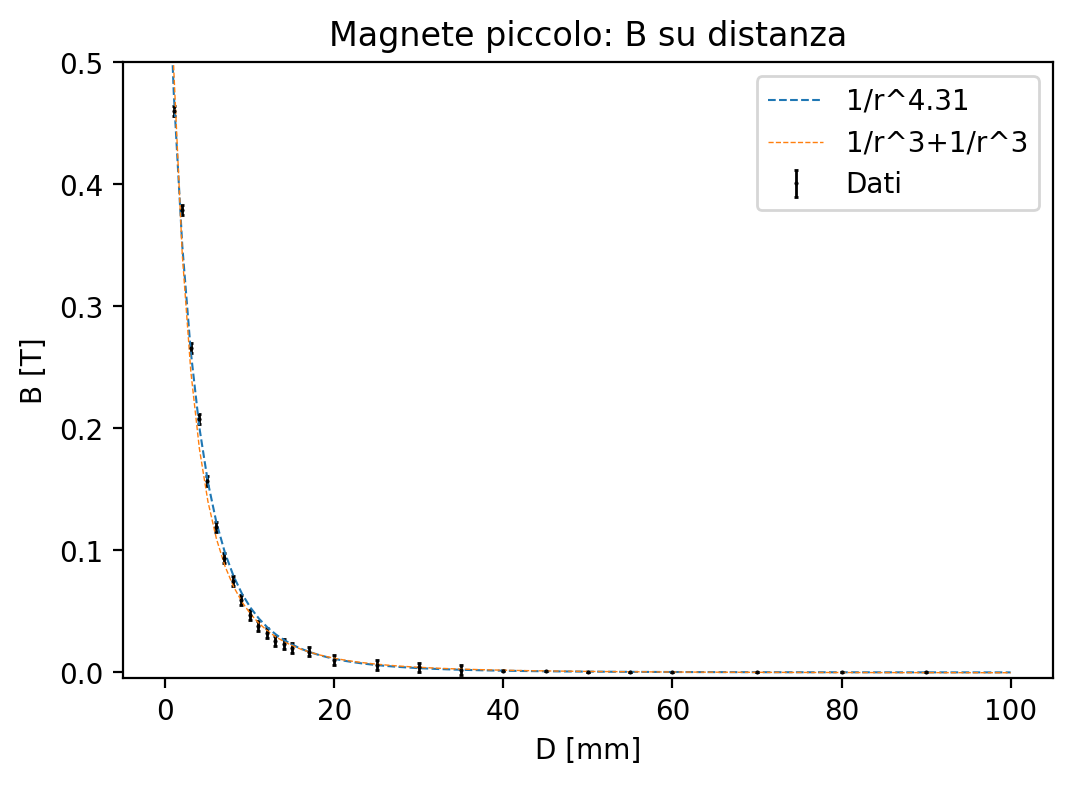

In [12]:
dati2 = np.loadtxt("data/magnete_piccolo_su_d.csv", skiprows=1)

d2 = dati2[:,1]   # ascissa
B2 = dati2[:,0]   # ordinata
err_B2 = dati2[:,2] # errore su B

## TOGLIERE IL PRIMO PUNTO? ##
d2 = d2[1:]   
B2 = B2[1:]   
err_B2 = err_B2[1:] * 4

low1 = (-np.inf, -np.inf, -0.001)
upp1 = (np.inf, np.inf, 0.001)
low2 = (0, -np.inf, -np.inf, -0.001)
upp2 = (20, np.inf, np.inf, 0.001)
low3 = (-np.inf, -np.inf, -np.inf, -np.inf, -0.001)
upp3 = (np.inf, np.inf, np.inf, np.inf, 0.001)

# FIT #
popt2_1, pcov2_1 = curve_fit(reciproco_cubo, d2, B2, sigma=err_B2, bounds=(low1,upp1))
popt2_2, pcov2_2 = curve_fit(esponente_libero, d2, B2, sigma=err_B2, bounds=(low2,upp2), maxfev=10000)
popt2_3, pcov2_3 = curve_fit(altra, d2, B2, sigma=err_B2, bounds=(low1,upp1), maxfev=10000)
popt2_4, pcov2_4 = curve_fit(due_reciproci_cubi, d2, B2, sigma=err_B2, bounds=(low3,upp3), maxfev=100000)


plt.figure(figsize=(6, 4), dpi=200)
# dati
plt.errorbar(
    d2, B2, yerr=err_B2,
    fmt='o',  # Solo marker, senza linee tra i punti
    markersize=0.5,  # Dimensione dei marker leggermente aumentata
    elinewidth=1,  # Spessore delle barre d'errore ridotto per leggibilità
    capsize=0.8,  # Aggiunge terminali alle barre d'errore
    capthick=1,  # Spessore dei terminali
    color='black',  # Colore neutro per evitare distrazioni
    label='Dati'
)
x_fit2 = np.linspace(0, 100, 100)  # Intervallo per il fit
# CUBO
y_fit2_1 = reciproco_cubo(x_fit2, *popt2_1)
etichetta2_1 = f"a={popt2_1[0]:.2f}\nΔx={popt2_1[1]:.2f}\nΔy={popt2_1[2]:.2f}"
#plt.plot(x_fit2, y_fit2_1, linestyle='--', label='1/r^3', markersize=3, linewidth=0.5)
# ESPONENTE PARAMETRO LIBERO
y_fit2_2 = esponente_libero(x_fit2, *popt2_2)
etichetta2_2 = f"a={popt2_2[0]:.2f}\nΔx={popt2_2[1]:.2f}\nΔy={popt2_2[2]:.2f}"
plt.plot(x_fit2, y_fit2_2, linestyle='--', label=f'1/r^{popt2_2[0]:.2f}', markersize=3, linewidth=0.75)
# ALTRA
y_fit2_3 = altra(x_fit2, *popt2_3)
#plt.plot(x_fit2, y_fit2_3, linestyle='--', label=rf'$B_0$=1/1+(r)^{popt2_3[0]:.2f}', markersize=3, linewidth=0.75)
# DUE RECIPROCI CUBI
y_fit2_4 = due_reciproci_cubi(x_fit2, *popt2_4)
#etichetta2_4 = f"a={popt2_1[0]:.2f}\nΔx={popt2_1[1]:.2f}\nΔy={popt2_1[2]:.2f}"
plt.plot(x_fit2, y_fit2_4, linestyle='--', label='1/r^3+1/r^3', markersize=3, linewidth=0.5)

plt.xlabel("D [mm]")
#plt.yscale('log')
plt.ylabel("B [T]") # [T]
plt.ylim(-0.005, 0.5)
plt.title("Magnete piccolo: B su distanza")
#plt.grid(linestyle='--')
plt.legend()
plt.show()

In [13]:
chi2_2_1 = chi_quadro(reciproco_cubo, popt2_1, d2, B2, err_B2)
chi2_2_2 = chi_quadro(esponente_libero, popt2_2, d2, B2, err_B2)
chi2_2_4 = chi_quadro(due_reciproci_cubi, popt2_4, d2, B2, err_B2)


print(f"Chi quadro ridotto per 1/r^3: {chi2_2_1:.3f}")
print(f"Chi quadro ridotto per 1/r^{popt2_2[0]:.2f}: {chi2_2_2:.3f}")
print(f"Chi quadro ridotto per 1/r^3+1/r^3: {chi2_2_4:.3f}")


Chi quadro ridotto per 1/r^3: 13.908
Chi quadro ridotto per 1/r^4.31: 3.703
Chi quadro ridotto per 1/r^3+1/r^3: 15.117


In [14]:
# stime numeriche usando la funzione fittata per il magnete piccolo
distanze = range(1,36)
B_da_1_a_35_piccolo = [esponente_libero(d, *popt2_2) for d in distanze]
B0_piccolo = esponente_libero(0.1, *popt2_2)

# Calcolo l'errore sui parametri
param_errors_piccolo = np.sqrt(np.diag(pcov2_2))

# Calcolo l'errore sulle stime
B_da_1_a_35_err_piccolo = [propagate_error(d, esponente_libero, popt2_2, param_errors_piccolo) for d in distanze]
B0_err_piccolo = propagate_error(0.1, esponente_libero, popt2_2, param_errors_piccolo)

# Stampo i risultati per il magnete piccolo
print("\nRisultati per il magnete piccolo:")
print(f" d [mm] |   B [T]   |   σ [T]")
print(f"--------|-----------|----------")
print(f"   .1   |  {B0_piccolo:.5f}  |  {B0_err_piccolo:.5f}")
for i, d in enumerate(distanze):
    if d < 10:
        print(f"    {d}   |  {B_da_1_a_35_piccolo[i]:.5f}  |  {B_da_1_a_35_err_piccolo[i]:.5f}")
    else:
        print(f"   {d}   |  {B_da_1_a_35_piccolo[i]:.5f}  |  {B_da_1_a_35_err_piccolo[i]:.5f}")


Risultati per il magnete piccolo:
 d [mm] |   B [T]   |   σ [T]
--------|-----------|----------
   .1   |  0.63921  |  0.76077
    1   |  0.47674  |  0.56774
    2   |  0.35175  |  0.41959
    3   |  0.26477  |  0.31661
    4   |  0.20283  |  0.24326
    5   |  0.15781  |  0.18990
    6   |  0.12448  |  0.15033
    7   |  0.09941  |  0.12051
    8   |  0.08028  |  0.09770
    9   |  0.06548  |  0.08001
   10   |  0.05390  |  0.06613
   11   |  0.04474  |  0.05511
   12   |  0.03742  |  0.04629
   13   |  0.03152  |  0.03915
   14   |  0.02673  |  0.03333
   15   |  0.02279  |  0.02855
   16   |  0.01955  |  0.02458
   17   |  0.01685  |  0.02128
   18   |  0.01460  |  0.01851
   19   |  0.01271  |  0.01618
   20   |  0.01110  |  0.01420
   21   |  0.00974  |  0.01251
   22   |  0.00858  |  0.01106
   23   |  0.00758  |  0.00982
   24   |  0.00672  |  0.00874
   25   |  0.00597  |  0.00781
   26   |  0.00533  |  0.00699
   27   |  0.00476  |  0.00628
   28   |  0.00427  |  0.00566
   2

# Previsioni B magnete piccolo

Valuto il campo magnetico del magnete piccolo con la funzione di fit alle distanze impiegate nell'esperimento.

In [15]:
distanze = [17, 19, 20, 22, 24, 30, 33, 39, 40]

In [18]:
previsioni_B = esponente_libero(np.array(distanze), *popt2_2)
print("\nPrevisioni B magnete piccolo:")
print(f" d [mm] |   B [T]   )|")
print(f"--------|-----------|")
for i, d in enumerate(distanze):
    if d < 10:
        print(f"    {d}   |  {previsioni_B[i]:.5f}  |")
    else:
        print(f"   {d}   |  {previsioni_B[i]:.5f}  |")


Previsioni B magnete piccolo:
 d [mm] |   B [T]   )|
--------|-----------|
   17   |  0.01685  |
   19   |  0.01271  |
   20   |  0.01110  |
   22   |  0.00858  |
   24   |  0.00672  |
   30   |  0.00346  |
   33   |  0.00256  |
   39   |  0.00147  |
   40   |  0.00135  |


In [20]:
previsioni_B

array([0.01685433, 0.01270503, 0.01110222, 0.00857636, 0.00671791,
       0.00345788, 0.00255966, 0.00147035, 0.00134735])